In [41]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline

In [2]:
def load_data(directory, file_name, names=None, header=None, skiprows=0):
    return pd.read_csv(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=True)

In [3]:
def using_model(model, scoring, cv):
    print("****************** {} ******************".format(model))
    model.fit(X_train_pre, y_train_pre)
    y_predict = model.predict(X_test_pre)
    print("accuracy_score=", accuracy_score(y_test_pre, y_predict))
    print("precision_score=", precision_score(y_test_pre, y_predict, average='micro'))
    print("recall_score=", recall_score(y_test_pre, y_predict, average='micro'))
    


In [4]:
base_directory = '~/workspace/personal/datasets/wine'

In [5]:
columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols ', 'Flavanoids', 'Nonflavanoid phenols', 
           'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines', 'Proline']

In [6]:
wine_data = load_data(base_directory, 'wine.data', names=columns)

In [7]:
wine_data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
wine_data.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


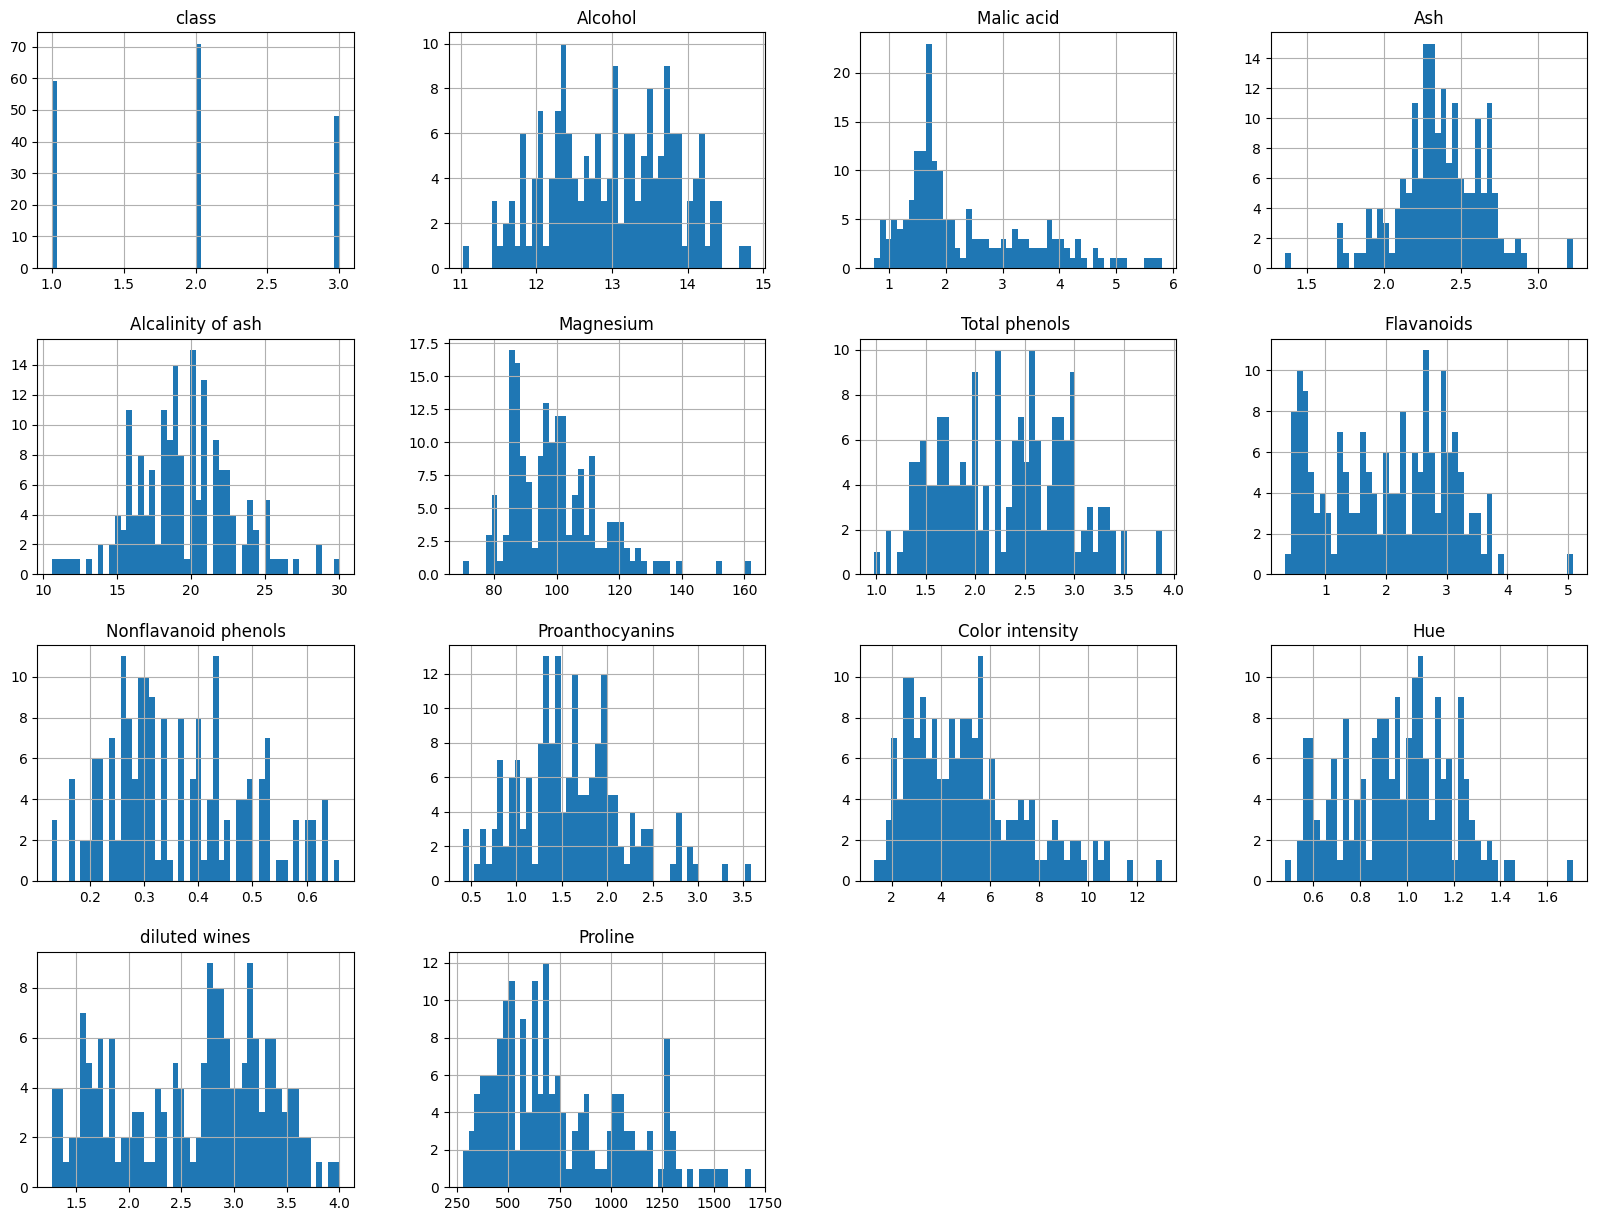

In [9]:
wine_data.hist(bins=50, figsize=(20,15))
plt.show()

In [48]:
#scatter_matrix(wine_data.drop('class', axis=1), figsize=(20, 25))

In [11]:
#wine_data.drop('class', axis=1).corr().style.background_gradient()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [12]:
wine_data.columns.tolist()[1:]

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols ',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'diluted wines',
 'Proline']

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

for train_index, test_index in split.split(wine_data, wine_data["class"]):
        train_set = wine_data.loc[train_index]
        test_set = wine_data.loc[test_index]

array([[<AxesSubplot: title={'center': 'class'}>,
        <AxesSubplot: title={'center': 'Alcohol'}>,
        <AxesSubplot: title={'center': 'Malic acid'}>,
        <AxesSubplot: title={'center': 'Ash'}>],
       [<AxesSubplot: title={'center': 'Alcalinity of ash'}>,
        <AxesSubplot: title={'center': 'Magnesium'}>,
        <AxesSubplot: title={'center': 'Total phenols '}>,
        <AxesSubplot: title={'center': 'Flavanoids'}>],
       [<AxesSubplot: title={'center': 'Nonflavanoid phenols'}>,
        <AxesSubplot: title={'center': 'Proanthocyanins'}>,
        <AxesSubplot: title={'center': 'Color intensity'}>,
        <AxesSubplot: title={'center': 'Hue'}>],
       [<AxesSubplot: title={'center': 'diluted wines'}>,
        <AxesSubplot: title={'center': 'Proline'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

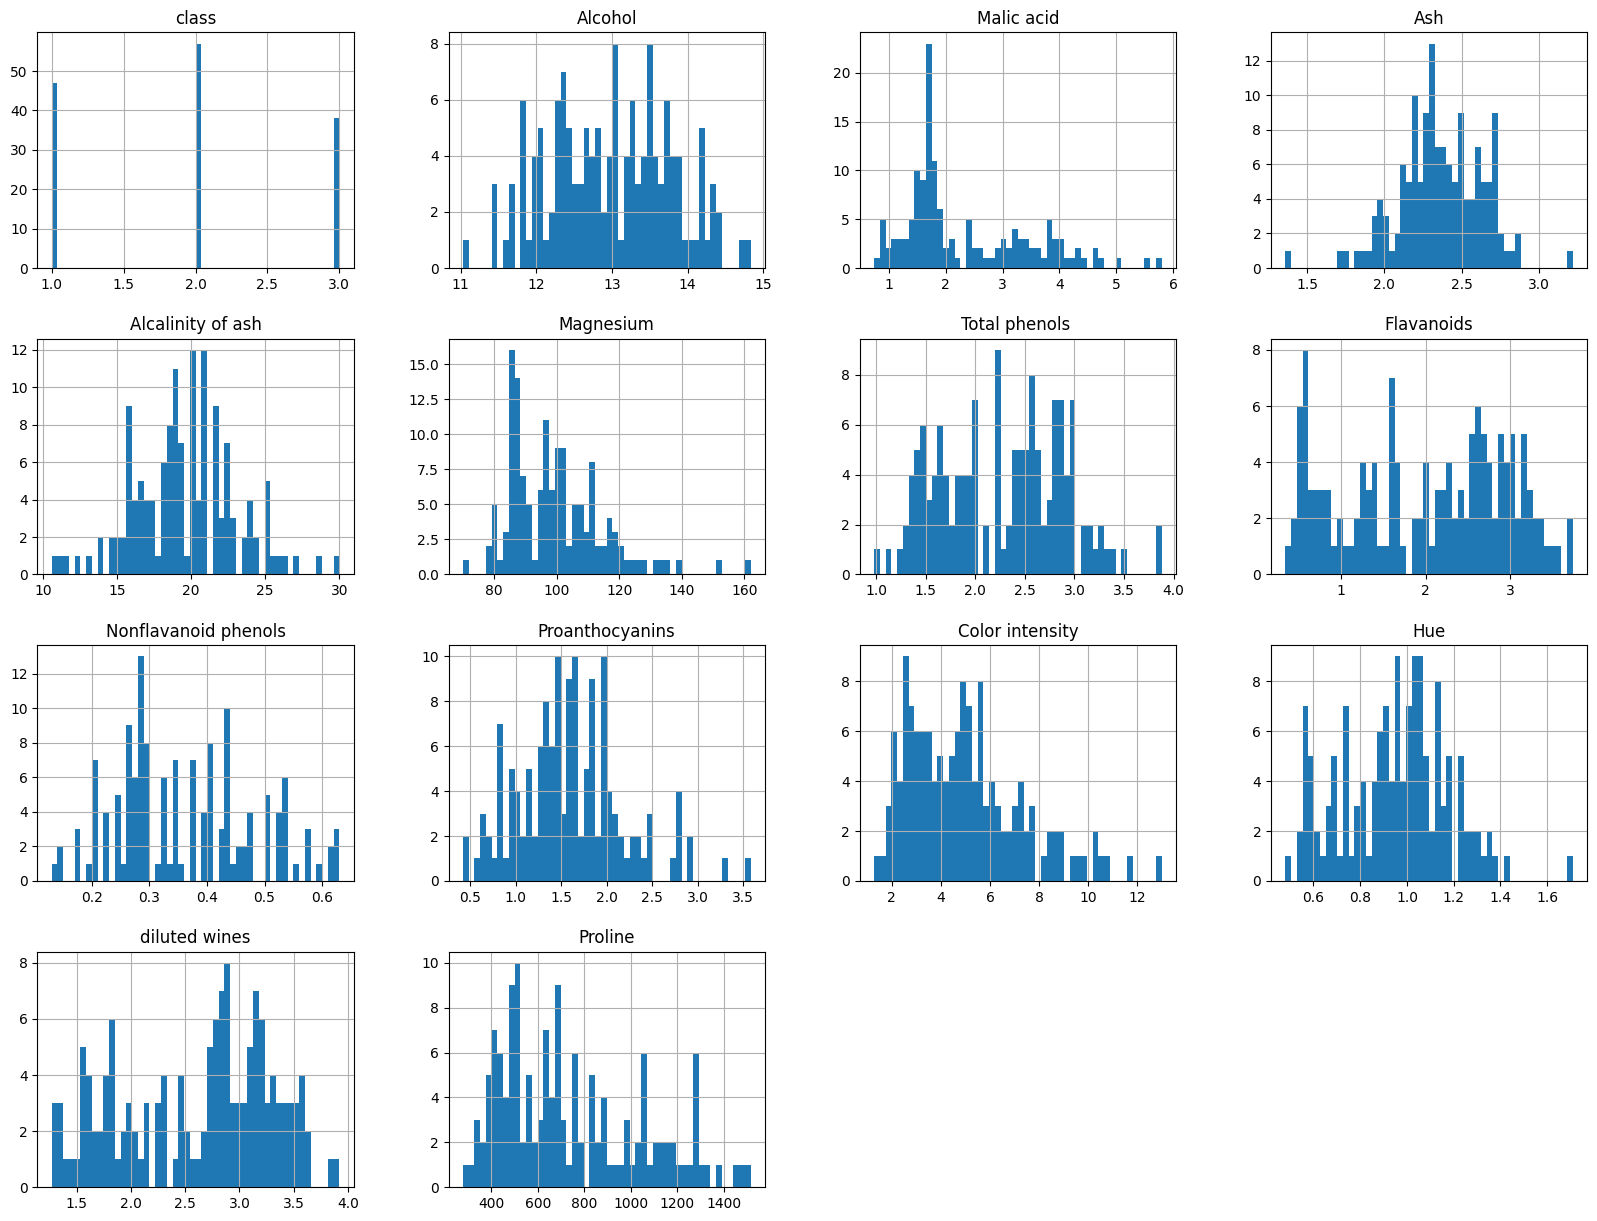

In [14]:
#train_set.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot: title={'center': 'class'}>,
        <AxesSubplot: title={'center': 'Alcohol'}>,
        <AxesSubplot: title={'center': 'Malic acid'}>,
        <AxesSubplot: title={'center': 'Ash'}>],
       [<AxesSubplot: title={'center': 'Alcalinity of ash'}>,
        <AxesSubplot: title={'center': 'Magnesium'}>,
        <AxesSubplot: title={'center': 'Total phenols '}>,
        <AxesSubplot: title={'center': 'Flavanoids'}>],
       [<AxesSubplot: title={'center': 'Nonflavanoid phenols'}>,
        <AxesSubplot: title={'center': 'Proanthocyanins'}>,
        <AxesSubplot: title={'center': 'Color intensity'}>,
        <AxesSubplot: title={'center': 'Hue'}>],
       [<AxesSubplot: title={'center': 'diluted wines'}>,
        <AxesSubplot: title={'center': 'Proline'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

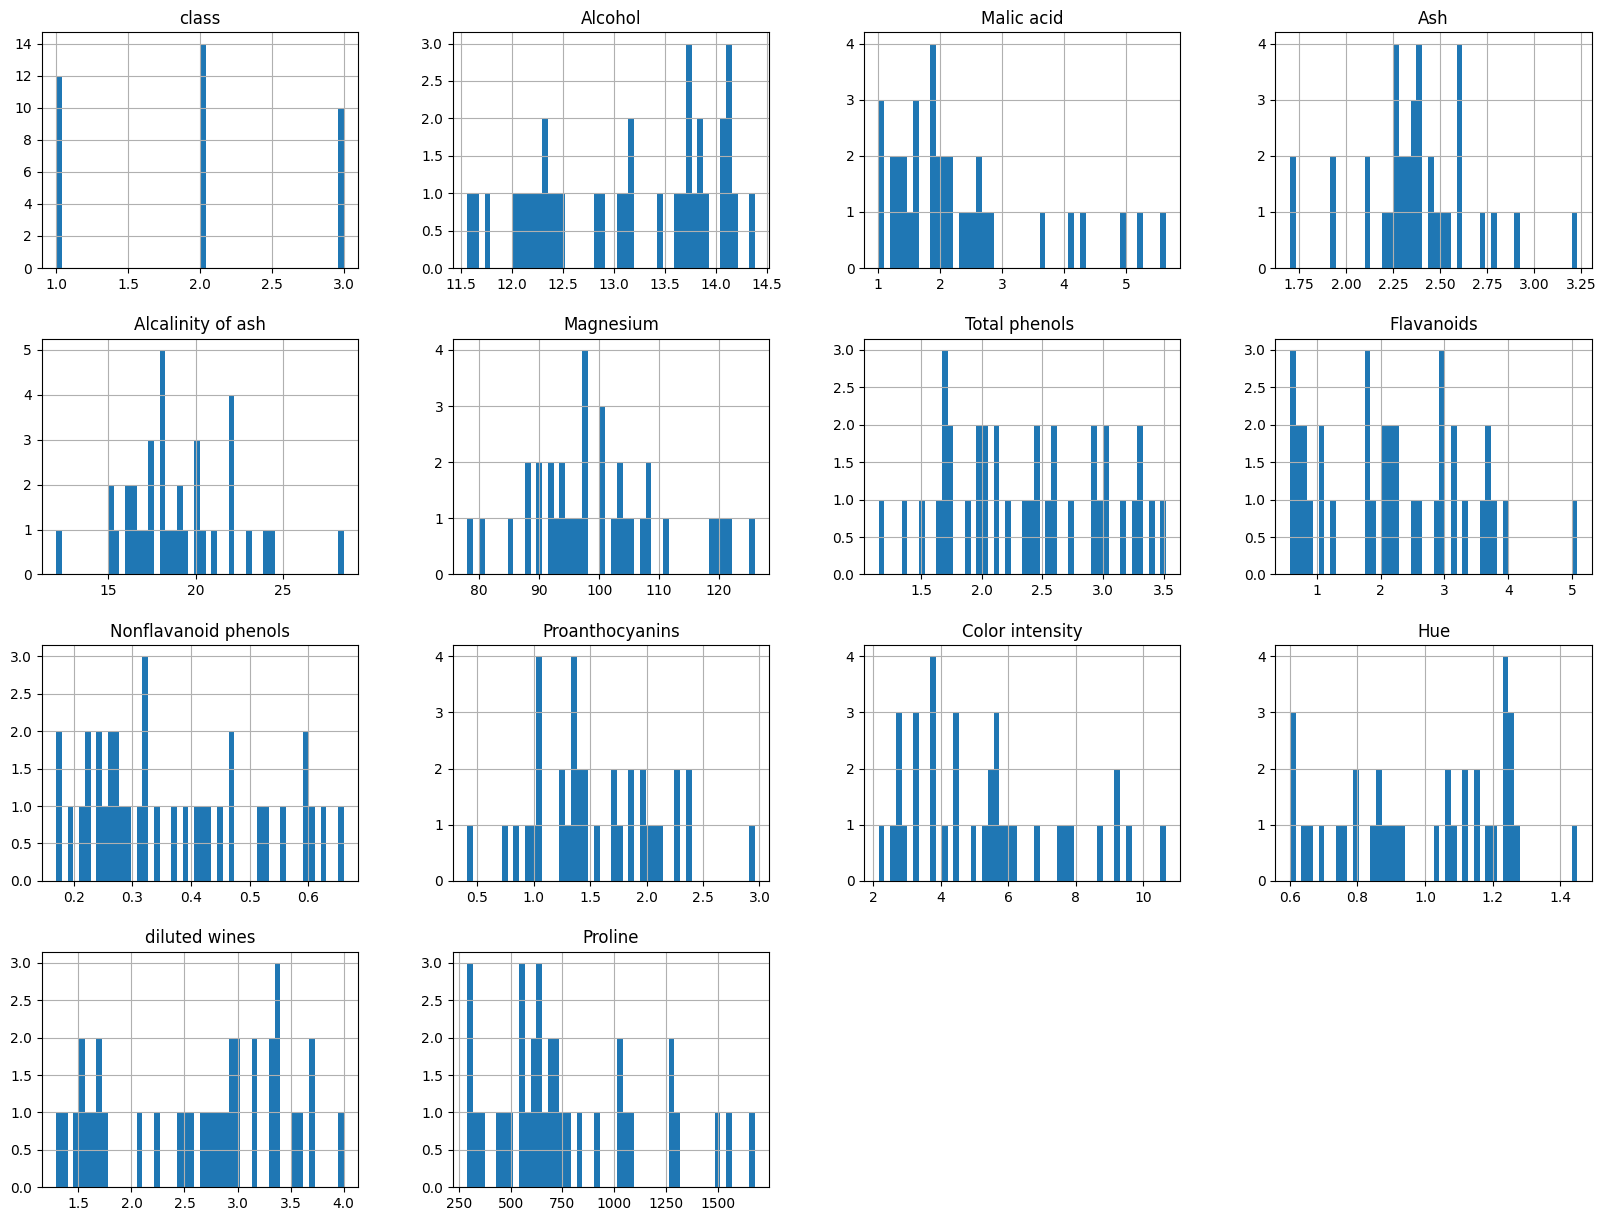

In [15]:
#test_set.hist(bins=50, figsize=(20,15))

In [16]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [17]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        #('minmax_scaler', MinMaxScaler()),
    ])

X_transformer = ColumnTransformer(transformers=[
    ("norm2", num_pipeline, columns[1:])
])


X_train_pre = X_transformer.fit_transform(X_train)
y_train_pre = LabelEncoder().fit_transform(y_train)

X_test_pre = X_transformer.fit_transform(X_test)
y_test_pre = LabelEncoder().fit_transform(y_test)

<AxesSubplot: >

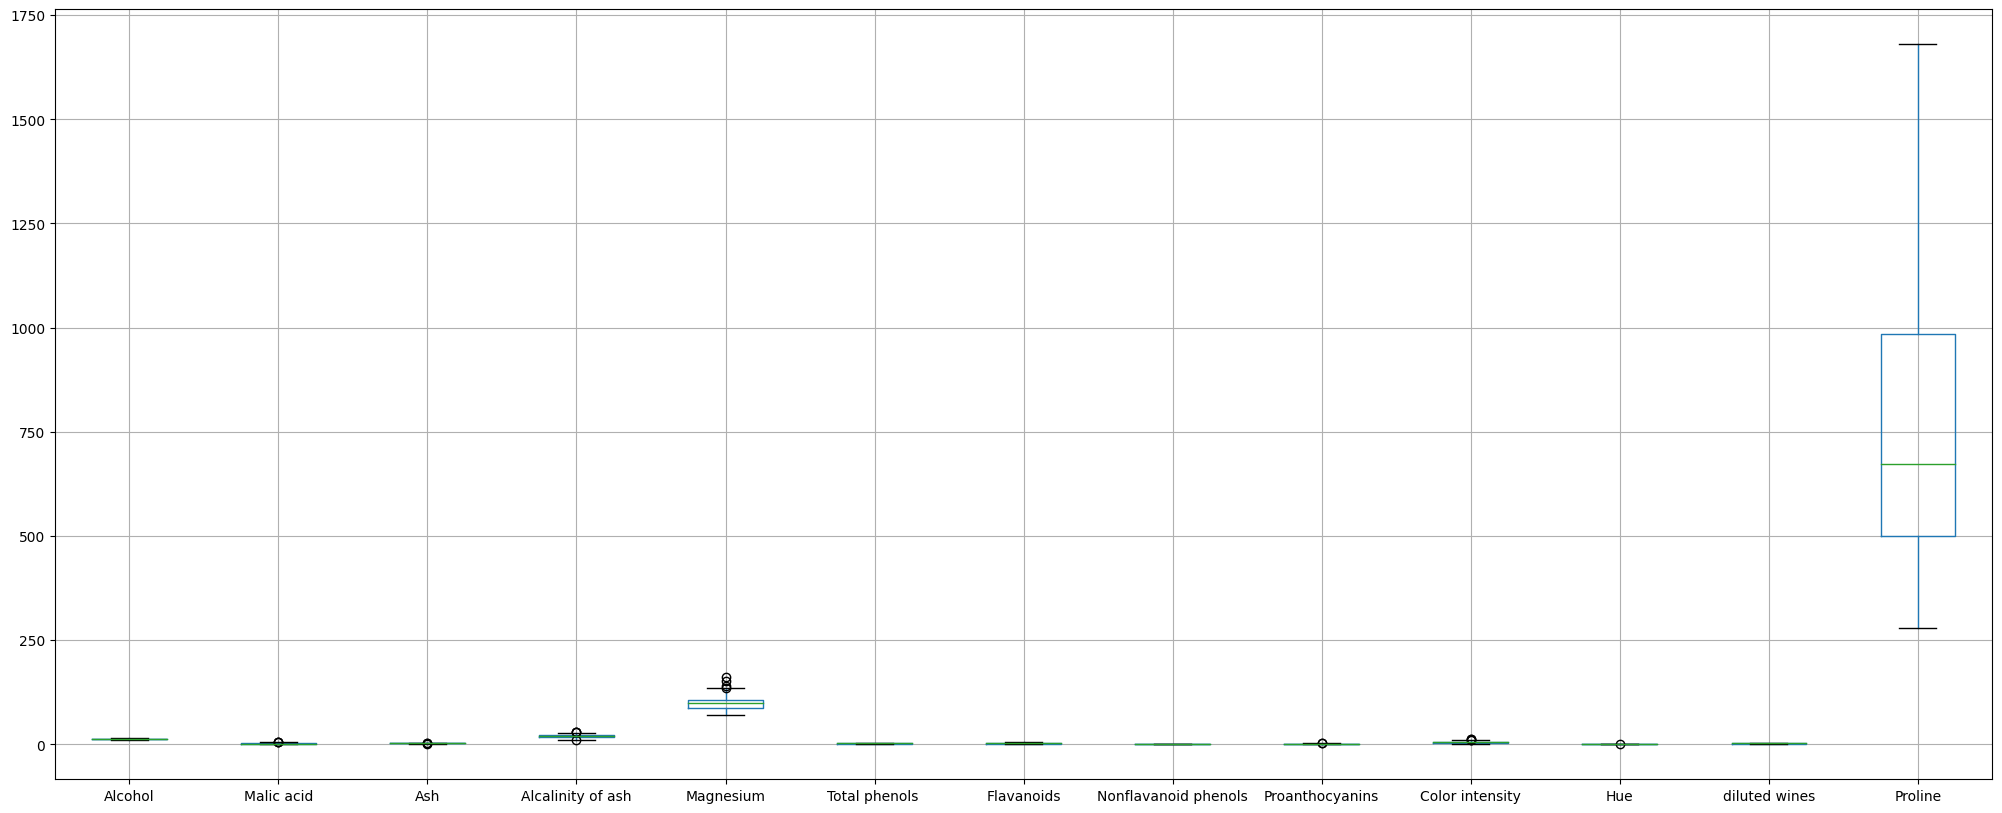

In [18]:
wine_data.boxplot(column=columns[1:], figsize=(25, 10))

<AxesSubplot: >

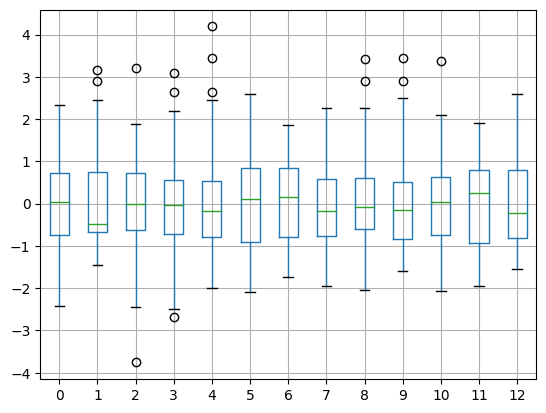

In [19]:
pd.DataFrame(X_train_pre).boxplot() 

In [49]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 5)
t = pca.fit_transform(X_train_pre)
X_train_pre[0], t


(array([ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474]),
 array([[-1.47234303e+00, -7.34250716e-01, -4.54891817e-01,
         -1.03594755e+00,  5.49675792e-01],
        [-2.64970940e+00, -1.23021145e+00, -1.50046210e+00,
         -7.48547675e-01, -1.08490377e-01],
        [-1.88878827e+00, -7.92471604e-01,  9.91753532e-02,
         -1.00696033e+00, -7.72992340e-01],
        [-2.21115907e+00, -7.53457676e-01,  7.92728229e-01,
         -1.18832038e+00, -5.89930132e-01],
        [ 2.81757114e+00, -1.64568754e+00,  3.85180198e-01,
          1.45549667e-01, -5.62509609e-01],
        [ 3.73165137e+00, -9.43745154e-01,  1.27412107e+00,
         -6.44866225e-01, -2.34790301e-01],
        [-2.00318459e+00,  1.48866684e+00,  1.46729734e+00,
          1.89916623e+00,  3.88604427e+00],
        [ 2.28749052e+00, -2.37989381e+00, -4.36986113e-01,
          1.41615

In [21]:
using_model(LogisticRegression(multi_class='multinomial'), "accuracy", 10)

****************** LogisticRegression(multi_class='multinomial') ******************
accuracy_score= 0.9444444444444444
precision_score= 0.9444444444444444
recall_score= 0.9444444444444444


In [22]:
from sklearn.linear_model import RidgeClassifier

using_model(RidgeClassifier(), "accuracy", 10)

****************** RidgeClassifier() ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222


In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier

using_model(HistGradientBoostingClassifier(), "accuracy", 10)

****************** HistGradientBoostingClassifier() ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222


In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

using_model(OneVsRestClassifier(LinearSVC(random_state=0)), "accuracy", 10)

****************** OneVsRestClassifier(estimator=LinearSVC(random_state=0)) ******************
accuracy_score= 0.9444444444444444
precision_score= 0.9444444444444444
recall_score= 0.9444444444444444


In [25]:
from sklearn.tree import DecisionTreeClassifier

using_model(DecisionTreeClassifier(random_state=0), "accuracy", 10)

****************** DecisionTreeClassifier(random_state=0) ******************
accuracy_score= 0.9166666666666666
precision_score= 0.9166666666666666
recall_score= 0.9166666666666666


In [26]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=1000,
        max_samples=14, bootstrap=True, n_jobs=-1)
using_model(bag_clf, "accuracy", 10)

****************** BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=14,
                  n_estimators=1000, n_jobs=-1) ******************
accuracy_score= 0.9166666666666666
precision_score= 0.9166666666666666
recall_score= 0.9166666666666666


In [42]:
using_model(AdaBoostClassifier(), 'accuracy', 10)

****************** AdaBoostClassifier() ******************
accuracy_score= 0.8611111111111112
precision_score= 0.8611111111111112
recall_score= 0.8611111111111112


In [43]:
a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=225, 
                       algorithm="SAMME.R", learning_rate=0.3)
using_model(a, "accuracy", 10)

****************** AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=225) ******************
accuracy_score= 0.9444444444444444
precision_score= 0.9444444444444444
recall_score= 0.9444444444444444


In [44]:
from sklearn.svm import SVC

using_model(SVC(), "accuracy", 10)

****************** SVC() ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222


In [45]:
ovr = OneVsRestClassifier(SVC())

using_model(ovr, "accuracy", 10)

****************** OneVsRestClassifier(estimator=SVC()) ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222


In [46]:
from sklearn.neighbors import KNeighborsClassifier

using_model(KNeighborsClassifier(), "accuracy", 10)

****************** KNeighborsClassifier() ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222


In [47]:
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)


rfc.fit(X_train_pre, y_train_pre)
y_predict = rfc.predict(X_test_pre)
print("accuracy_score=", accuracy_score(y_test_pre, y_predict))
print("precision_score=", precision_score(y_test_pre, y_predict, average='micro'))
print("recall_score=", recall_score(y_test_pre, y_predict, average='micro'))

rfc.feature_importances_, X_train.columns

accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222


(array([0.10829912, 0.03351531, 0.01261466, 0.02601784, 0.03602397,
        0.05470399, 0.16280339, 0.01011814, 0.02081636, 0.18820819,
        0.08452268, 0.11540398, 0.14695238]),
 Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
        'Total phenols ', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
        'Proline'],
       dtype='object'))